# Allocation en ligne de tâches
Ce notebook présente un projet d'allocation multi-agents où une flotte de taxis doit effectuer des trajets (tâches) assignés en ligne.

Binôme:
- Perotti-Valle Rayan  
- Thomasson Malo

## Objectif
L'objectif est d'implémenter et de visualiser un système où :
- Des taxis se déplacent sur une grille pour effectuer des taches (trajets) assignés.
- Tous les T pas de temps on génére de nouvelles tâches à effectuer.
- On doit ensuite re-assigner ces tâches aux taxis de manière optimale.

## Structure du Projet
Le projet est structuré en plusieurs fichiers :
- **`config.py`** → Contient les constantes globales (taille de la grille, vitesse des taxis, couleurs, etc.).
- **`task.py`** → Définit la classe `Task`, qui représente une tâche (un trajet à effectuer).
- **`taxi.py`** → Définit la classe `Taxi`, qui représente un taxi capable de gérer une file de tâches.
- **`simulation.py`** → Gère la simulation, y compris l'affichage avec Pygame et l'assignation des tâches.
- **`notebook.ipynb`** → Ce fichier, qui permet d'interagir avec les modules et d'exécuter des tests.


## Partie 1 : Génération de tâches en ligne




In [1]:
import config
from task import Task
from taxi import Taxi
import simulation
import sys

%load_ext autoreload
%autoreload 2

pygame 2.6.1 (SDL 2.28.4, Python 3.12.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Paramètres de la simulation
Les paramètres globaux définis dans `config.py` :

In [2]:
# Affichage des paramètres du projet
print(f"Taille de la fenêtre : {config.WIDTH}x{config.HEIGHT}")
print(f"Nombre de taxis : {config.NUM_TAXIS}")
print(f"Nombre de FPS : {config.FPS}")
print(f"Nombre de taxis : {config.NUM_TAXIS}")
print(f"Intervalle de génération des tâches : {config.TASK_INTERVAL/1000} s")
print(f"Nombre de tâches générées : {config.NUM_TASKS_SPAWN}")
print(f"Vitesse des taxis : {config.TAXI_SPEED} pixels/seconde")


Taille de la fenêtre : 800x600
Nombre de taxis : 5
Nombre de FPS : 60
Nombre de taxis : 5
Intervalle de génération des tâches : 5.0 s
Nombre de tâches générées : 5
Vitesse des taxis : 200 pixels/seconde


## Création et Test des Classes `Task` et `Taxi`
Avant de lancer la simulation complète, nous allons vérifier le bon fonctionnement des classes `Task` et `Taxi`.


In [3]:
# Création de quelques tâches de test
task1 = Task(start=(10, 10), destination=(100, 100), id=1)
task2 = Task(start=(50, 50), destination=(150, 150), id=2)

print(task1)
print(task2)

Task(id=1, start=(10, 10), destination=(100, 100))
Task(id=2, start=(50, 50), destination=(150, 150))


In [4]:
# Création d'un taxi et assignation des tâches
taxi1 = Taxi(id=0, position=(0, 0))
taxi1.add_task(task1)
taxi1.add_task(task2)

# Vérification de l'état du taxi
print(f"Tâches du taxi {taxi1.id}: {taxi1.tasks}")
print(f"Itinéraire calculé : {taxi1.route}")

Tâches du taxi 0: [Task(id=1, start=(10, 10), destination=(100, 100)), Task(id=2, start=(50, 50), destination=(150, 150))]
Itinéraire calculé : [(10, 10), (100, 100), (50, 50), (150, 150)]


## Lancement de la Simulation Pygame

Nous allons maintenant exécuter la simulation complète. Cette simulation affiche les taxis et leurs trajets sur une interface graphique avec Pygame et itére les étapes suivantes :
- Génère des tâches dynamiquement toutes les n secondes (en fonction de TASK_INTERVAL),
- Assigne les tâches aux taxis en minimisant le coût avec **greedy_task_assignment**, (présent dans le fichier **`simulation.py`**) qui cherche parmi toutes les permutations possibles de tâches, celle qui minimise la somme des distances parcourues par les taxis.

Dans toutes les simulations, en utilisant **random_tasks** = True, on génère des tâches aléatoires, sinon on charge les tâches depuis le fichier **`task_created.json`**.

In [6]:
simulation.main(resolutionType="greedy", isPenalty=False, random_task=False)

Simulation(width=800, height=600, num_taxis=5, task_interval=5000, num_tasks_spawn=5)


AttributeError: 'float' object has no attribute 'append'

## Partie 2 : Optimisation de contraintes distribuées

Dans cette partie, on utilise les fonctions : 
- **`generate_dcop`** : qui génère un fichier yaml (**"dcop.yaml"**) avec un problème DCOP.
- **`solve_dcop`** : qui résout le problème DCOP en utilisant l'algo passé en paramètre (dpop, dsa, mgm).
- **`attribution_dcop`** : qui attribue les tâches aux taxis en utilisant les résultats du DCOP.

Lancer les differentes cellules suivantes qui specifie l'algorithme utilisé en paramètre de la fonction **`solve_dcop`**.

In [ ]:
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="dpop")

Simulation(width=800, height=600, num_taxis=3, task_interval=10000, num_tasks_spawn=5)


SystemExit: 

In [ ]:
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="dsa")

In [ ]:
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="mgm")

## Partie 3 : Négociation

Dans cette partie, nous implémentons et comparons différents protocoles de négociation pour l'allocation des tâches entre les taxis. Les protocoles étudiés sont :

**Enchères parallèles (PSI)** : Chaque taxi fait des offres en parallèle sur toutes les tâches disponibles.

**Enchères séquentielles (SSI)** : Les tâches sont attribuées une par une, en séquence.

**Enchères séquentielles basées sur le regret** : Les tâches sont attribuées en fonction de leur "regret", c'est-à-dire la différence entre le meilleur et le deuxième meilleur coût.


In [7]:

simulation.main(resolutionType="PSI", isPenalty=False, random_task=False)


Simulation(width=800, height=600, num_taxis=5, task_interval=5000, num_tasks_spawn=7)
Step 151, temps : 2.713s pour resolutionType = PSI


In [8]:
simulation.main(resolutionType="SSI", isPenalty=False, random_task=False)

Simulation(width=800, height=600, num_taxis=5, task_interval=5000, num_tasks_spawn=7)
Step 95, temps : 1.769s pour resolutionType = SSI


In [9]:
simulation.main(resolutionType="regret", isPenalty=False, random_task=False)

Simulation(width=800, height=600, num_taxis=5, task_interval=5000, num_tasks_spawn=7)
Step 40, temps : 0.881s pour resolutionType = regret


Nous avons également implementé une notion de penalité qui peut etre activé ou non, et qui ajoute une penalité au taxi en fonction des tâches présentes dans sa file.
Au niveau de la fonction **`insertion_heuristic`**, qui est utilisée pour tester l'insertion d'une tâche dans la file d'un taxi.
Cette fonction est utilisée dans les fonctions **`PSI_task_assignment`**, **`SSI_task_assignment`** et **`regret_task_assignment`**.

In [ ]:
simulation.main(resolutionType="PSI", isPenalty=True, random_task=False)

In [ ]:
simulation.main(resolutionType="SSI", isPenalty=True, random_task=False)

In [ ]:
simulation.main(resolutionType="regret", isPenalty=True, random_task=False)

## Commandes pour l'affichage des résultats

### Pour les algorithmes greedy, PSI, SSI et Regret

On affiche les résultats dans un fichier **`res.json`** qui contient les informations suivantes :
**resolutionType** : le type de resolution utilisé (greedy, PSI, SSI, regret)
**time** : le temps d'execution
**nombre de tache** : le nombre de tache généré à chaque intervalle


Ajuster les paramètres de la simulation dans le fichier **`config.py`** puis supprimer le contenu du fichier **`res.json`** avant de lancer une nouvelle simulation (il faut également restart le kernel pour charger les variables de **`config.py`**).

In [ ]:
print("Debut de la simulation avec des taches prédefinies")
print("Simulation avec l'algorithme greedy")   
simulation.main(resolutionType="greedy", isPenalty=False, random_task=False, algo="none")
print("Simulation avec l'algorithme PSI")
simulation.main(resolutionType="PSI", isPenalty=False, random_task=False, algo="none")
print("Simulation avec l'algorithme SSI")
simulation.main(resolutionType="SSI", isPenalty=False, random_task=False, algo="none")
print("Simulation avec l'algorithme regret")
simulation.main(resolutionType="regret", isPenalty=False, random_task=False, algo="none")
sys.exit()

Une fois le fichier res.json généré, on peut afficher les résultats en utilisant la fonction **`plot_results()`**. En spécifiant l'argument, on peut choisir de faire un histogramme selon deux paramètres : **time** ou **cost**.

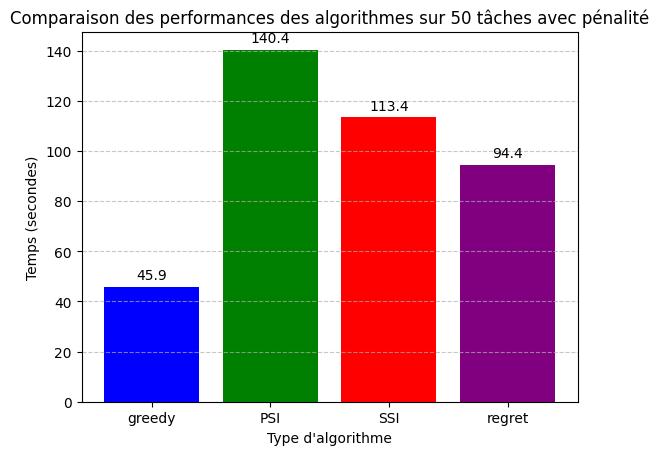

In [ ]:
simulation.plot_results("time")

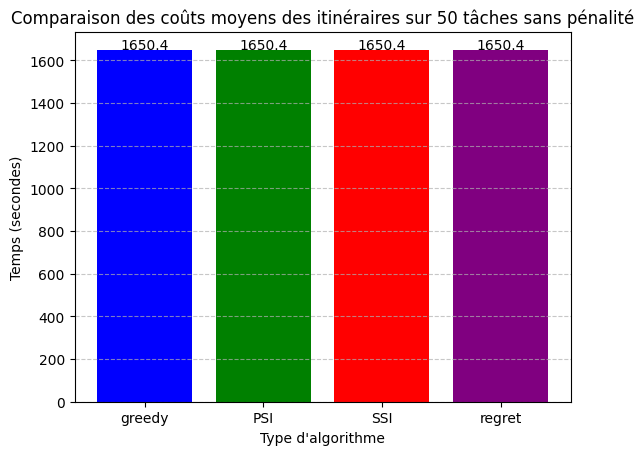

In [12]:
simulation.plot_results("cost")

### Pour les algorithmes DPOP, DSA et MGM

On affiche les résultats dans un fichier **`res_dcop.json`** qui contient les informations suivantes :
**algoDcop** : le type de resolution utilisé (greedy, PSI, SSI, regret)
**time** : le temps d'execution
**nombre de tache** : le nombre de tache généré à chaque intervalle
**moyenne du cout de route** : la moyenne du cout de route

Ajuster les paramètres de la simulation dans le fichier **`config.py`** puis supprimer le contenu du fichier **`res_dcop.json`** avant de lancer une nouvelle simulation (il faut également restart le kernel pour charger les variables de **`config.py`**).

In [ ]:
print("Debut de la simulation avec des taches prédefinies")
print("Simulation avec l'algorithme dpop")
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="dpop")
print("Simulation avec l'algorithme dsa")
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="dsa")
print("Simulation avec l'algorithme mgm")
simulation.main(resolutionType="dcop", isPenalty=False, random_task=False, algo="mgm")
sys.exit()

Une fois le fichier **`res_dcop.json`** généré, on peut afficher les résultats en utilisant la fonction **`plot_dcop_results()`**. En spécifiant l'argument, on peut choisir de faire un histogramme selon deux paramètres : **time** ou **cost**.

In [ ]:
simulation.plot_dcop_results("time")

In [ ]:
simulation.plot_dcop_results("cost")